# Soal 1 Inflasi Indonesia

In [1]:
#import depedencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/Inflasi - Inflasi.csv", encoding='utf-8')

In [3]:
df.head()

,Month,Inflasi
0,Juni 2019,3.28%
1,Mei 2019,3.32%
2,April 2019,2.83%
3,Maret 2019,2.48%
4,Februari 2019,2.57%


In [4]:
df.plot()
# Ketika ingin dicoba melihat visualisasi data, Muncul error 
# karena tidak ada kolom yang bernilai numerik seperti pada yang tertera pada error di bawah
# Solusinya adalah dengan menghilangkan tanda persen (%) pada kolom Inflasi

TypeError: no numeric data to plot

In [5]:
# Diperlukan dataframe baru untuk memperbaiki nilai inflasi yang ada pada setiap bulannya
# dengan menghilangkan tanda % (persen) pada kolom Inflasi
# Proses ini dapat dilakukan dengan code simpel berikut ini

row_count = 0
nama_column = []
row_month = []
row_year = []
row_inflasi = []
with open('dataset/Inflasi - Inflasi.csv','r') as file_r:
    lines = file_r.read().split('\n')
    
    for line in lines:
        if (row_count == 0):
            nama_column.append(line.split(',')[0])
            nama_column.append(line.split(',')[1])
        else:
            row_month.append(line.split(',')[0])
            row_year.append((line.split(',')[0]).split(' ')[1])
            row_inflasi.append(float((line.split(',')[1]).split('%')[0]))
        row_count += 1

In [6]:
# Me-reverse isi list yang ada untuk menjadikan progress
# dari bulan tahun yang lebih tua ke bulan tahun yang lebih muda ke arah kanan
row_year.reverse()
row_month.reverse()
row_inflasi.reverse()

In [7]:
# Menggabungkan dua list menggunakan zip function
new_data = zip(row_month, row_inflasi)

In [8]:
# Dataframe yang baru sudah bisa dipakai
new_df = pd.DataFrame(new_data, index=[x for x in range(0,len(row_inflasi))], columns=nama_column)

In [9]:
new_df.head()

,Month,Inflasi
0,Desember 2002,0.00
1,Januari 2003,8.68
2,Februari 2003,7.60
3,Maret 2003,7.17
4,April 2003,7.62


In [10]:
# Informasi dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 2 columns):
Month      199 non-null object
Inflasi    199 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [11]:
# data statistik dari dataframe
new_df.describe()

,Inflasi
count,199.000000
mean,6.314724
std,3.316154
min,0.000000
25%,3.855000
50%,6.040000
75%,7.285000
max,18.380000


In [12]:
# Inflasi tertinggi
new_df[new_df["Inflasi"]==18.38]

,Month,Inflasi
35,Nopember 2005,18.38


In [13]:
# Inflasi terendah
new_df[new_df["Inflasi"]==0.00]

,Month,Inflasi
0,Desember 2002,0.0


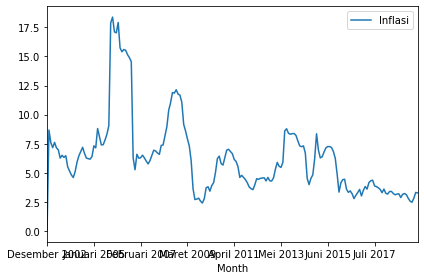

In [14]:
new_df.plot(x='Month',y='Inflasi')
plt.tight_layout()

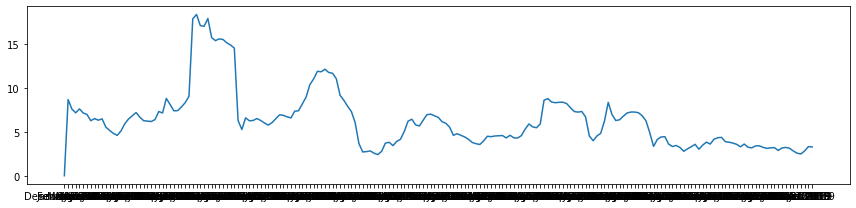

In [15]:
plt.figure(figsize=(12,3))
plt.plot(row_month, row_inflasi)
plt.tight_layout()
plt.savefig('Inflasi.png', dpi=1200)

Berdasarkan data statistik dataframe dan grafik Inflasi di atas, diketahui bahwa inflasi tertinggi sebesar 18.38% terjadi pada bulan November tahun 2005 dan inflasi terendah sebesar 0% terjadi pada bulan Desember tahun 2002 (bisa jadi karena tidak ada rekaman data pada bulan tersebut).

Nilai inflasi Indonesia sejak bulan Januari 2003 terus bergerak cenderung menurun hingga bulan Februari 2004. Sejak bulan februari 2004, nilai inflasi terus bergerak naik hingga mencapai nilai tertinggi pada bulan November 2005. Setelah bulan November 2005, nilai inflasi masih sangat tinggi walaupun ada penurunan dan terjadi penurunan yang sangat drastis pada bulan September 2006. 

Sejak bulan Oktober 2006, nilai inflasi kembali cenderung naik hingga bulan September 2008 yaitu sebesar 12.14% meskipun tidak sampai ke nilai inflasi tertinggi sebelumnya. 

Setelah bulan tersebut, nilai inflasi di Indonesia kadang terlihat naik dan kemudian turun, terkadang stabil. Walaupun terjadi kenaikan, nilai inflasinya tidak melebihi 10% dan semenjak bulan November 2015, nilai Inflasi di Indonesia cenderung stabil yang berkisar antara 2 - 6 persen hingga bulan Juni 2019

Kita juga dapat melihat data inflasi per tahun dengan membuat dataframe baru yang berisi list dari tahun dan inflasi

In [16]:
# Menggabungkan list row_year dan row_inflasi
inflasi_year = zip(row_year, row_inflasi)

In [17]:
# Membuat dataframe Inflasi berdasarkan tahun
inf_year = pd.DataFrame(inflasi_year, columns=['Tahun', 'Inflasi'])

In [18]:
inf_year.head()

,Tahun,Inflasi
0,2002,0.00
1,2003,8.68
2,2003,7.60
3,2003,7.17
4,2003,7.62


Berdasarkan dataframe inflasi tahun di atas, nilai inflasi masih terkelompokkan dengan bulan belum dengan tahun.
Jadi, untuk menjadikan data inflasi yang ada menjadi per tahun, diperlukan proses pennggabungan nilai inflasi setiap tahun dan dicari nilai rata-ratanya.

In [19]:
inf_per_year = inf_year.groupby(['Tahun']).mean()
inf_per_year

,Inflasi
Tahun,
2002,0.000000
2003,6.790000
2004,6.057500
2005,10.402500
2006,13.331667
2007,6.404167
2008,10.308333
2009,4.895000
2010,5.125000


In [20]:
inf_per_year.describe()

,Inflasi
count,18.000000
mean,5.897824
std,3.099849
min,0.000000
25%,3.926458
50%,5.718750
75%,6.697292
max,13.331667


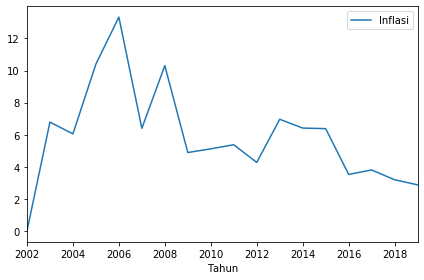

In [21]:
# memvisualiasikan nilai inflasi per tahun dan 
inf_per_year.plot()
plt.tight_layout()

Akhirnya kita memperoleh grafik yang berasal dari nilai inflasi rata-rata per tahun. 
Nilai rata-rata inlasi tertinggi terdapat pada tahun 2006 yaitu sebesar 13.33%

Sejak tahun 2002 sampai 2006. Nilai rata-rata inflasi bergerak naik hingga mencapai puncak pada tahun 2006. Selama itu, nilai inflasi tersebut hanya turun sedikit antara tahun 2003 dan 2004.

Setelah tahun 2006, terhadi kenaikan dan penurunan nilai rata-rata inflasi per tahun yang sangat signifikan walaupun tidak mencapai nilai tertinggi. Sejak tahun 2009, nilai inflasi tersebut juga mengalani kenaikan dan penurunan tetapi tidak sesignifikan kurva sebelum tahun tersebut.

Dan setalah tahun 2015, kurva nilai rata-rata inflasi cenderung turun dan mencapai titik inflasi yang tergolong rendah dan stabil pada tahun 2019